# Exploratative Data Analysis of IPL Matches

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing IPL Dataset

In [2]:
data=pd.read_csv("IPL.csv")
# data.head()
data.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
5,6,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
6,7,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
8,9,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
9,10,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN


### How big is the dataset? (Rows and Columns)

In [3]:
data.shape

(577, 18)

### Name of all the columns (labels)

In [4]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Data Pre-processing Finding out NaN values

In [5]:
data.isna().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1            False
umpire2            False
umpire3             True
dtype: bool

In [6]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,0.025997,13.715771,3.363951,NaN
std,166.709828,2.486247,0.159263,23.619282,3.416049,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,0.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,0.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,1.000000,144.000000,10.000000,NaN


In [7]:
data['id'].count()

577

### How many IPL seasons are we using to analysis?

In [8]:
data['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

### which IPL team won by scoring the maximum runs?

In [9]:
data.iloc[data['win_by_runs'].idxmax()]

id                                         561
season                                    2016
city                                 Bangalore
date                                2016-05-14
team1              Royal Challengers Bangalore
team2                            Gujarat Lions
toss_winner                      Gujarat Lions
toss_decision                            field
result                                  normal
dl_applied                                   0
winner             Royal Challengers Bangalore
win_by_runs                                144
win_by_wickets                               0
player_of_match                 AB de Villiers
venue                    M Chinnaswamy Stadium
umpire1                            AY Dandekar
umpire2                              VK Sharma
umpire3                                    NaN
Name: 560, dtype: object

### which ipl team win by maximum wickets

In [10]:
data.iloc[data['win_by_wickets'].idxmax()]

id                                         13
season                                   2008
city                                   Mumbai
date                               2008-04-27
team1                          Mumbai Indians
team2                         Deccan Chargers
toss_winner                   Deccan Chargers
toss_decision                           field
result                                 normal
dl_applied                                  0
winner                        Deccan Chargers
win_by_runs                                 0
win_by_wickets                             10
player_of_match                  AC Gilchrist
venue              Dr DY Patil Sports Academy
umpire1                             Asad Rauf
umpire2                            SL Shastri
umpire3                                   NaN
Name: 12, dtype: object

### Which ipl team win by minimum wickets

In [11]:
data.iloc[data['win_by_wickets'].idxmin()]

id                                           1
season                                    2008
city                                 Bangalore
date                                2008-04-18
team1                    Kolkata Knight Riders
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                            field
result                                  normal
dl_applied                                   0
winner                   Kolkata Knight Riders
win_by_runs                                140
win_by_wickets                               0
player_of_match                    BB McCullum
venue                    M Chinnaswamy Stadium
umpire1                              Asad Rauf
umpire2                            RE Koertzen
umpire3                                    NaN
Name: 0, dtype: object

### Which season consisted of the highest numbers of matches ever played?


<function matplotlib.pyplot.show(close=None, block=None)>

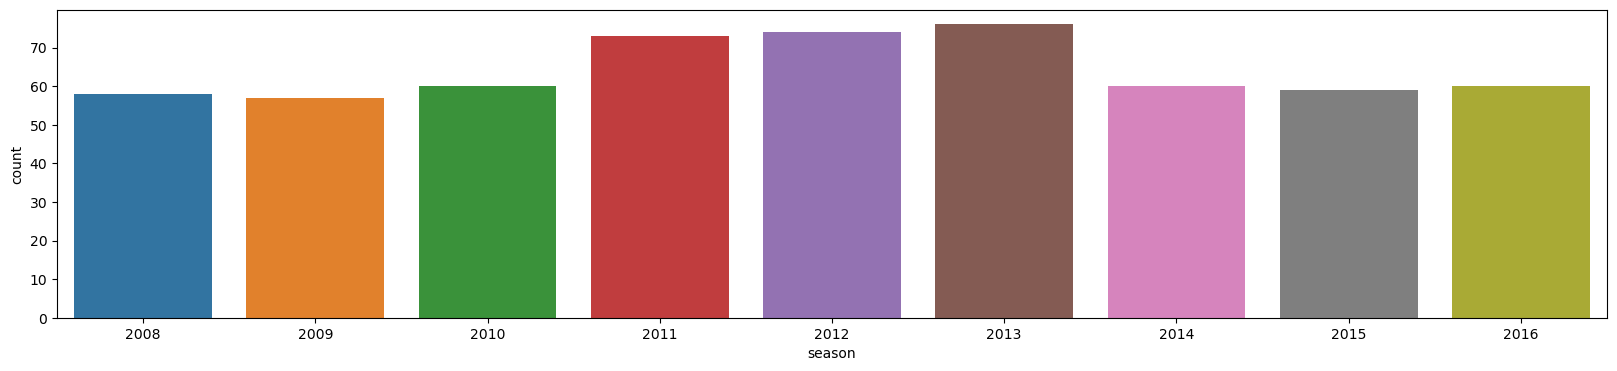

In [12]:
fig_dims=(20,4)
fig,ax=plt.subplots(figsize=fig_dims)
sns.countplot(x='season',ax=ax,data=data)
plt.show

<AxesSubplot:xlabel='winner'>

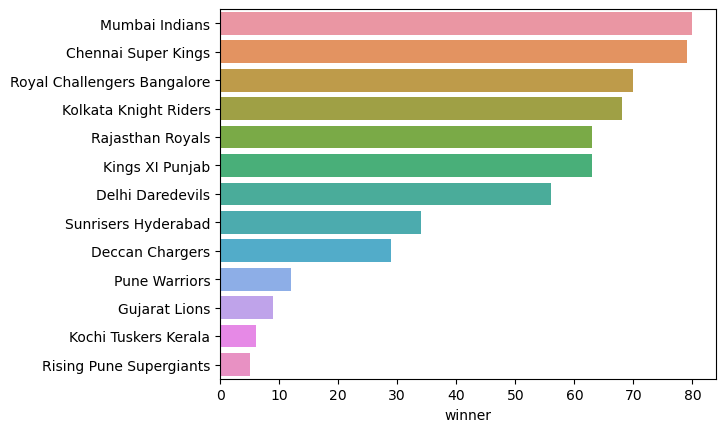

In [13]:
data1=data.winner.value_counts()
sns.barplot(y=data1.index,x=data1)

### What is the probability of winning a match if the toss was won?


In [14]:
probability_of_win=data['toss_winner']==data['winner']

probability_of_win.groupby(probability_of_win).size()

False    286
True     291
dtype: int64

C:\Users\bimal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

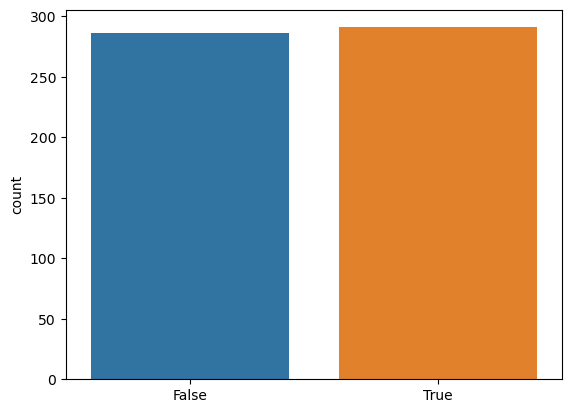

In [15]:
sns.countplot(probability_of_win)

### setting a higher row width

In [28]:
pd.set_option('display.max_rows', 99999)
pd.set_option('display.max_colwidth', 400)

max_colwidth_option = pd.get_option('display.max_colwidth')
print(max_colwidth_option)


400


### Highest wins by teams per season

In [29]:
data.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

In [30]:
data['toss_decision'].value_counts()

field    315
bat      262
Name: toss_decision, dtype: int64

### Man of the match -highest to lowest (in won matches)

In [31]:
data['player_of_match'].value_counts()

CH Gayle             17
YK Pathan            16
AB de Villiers       15
DA Warner            14
RG Sharma            13
SK Raina             13
AM Rahane            12
MEK Hussey           12
G Gambhir            12
MS Dhoni             12
V Sehwag             11
V Kohli              11
SR Watson            10
JH Kallis            10
DR Smith             10
SE Marsh              9
A Mishra              9
SR Tendulkar          8
KA Pollard            8
RA Jadeja             7
AC Gilchrist          7
AD Russell            6
M Vijay               6
Harbhajan Singh       6
A Nehra               6
UT Yadav              6
AT Rayudu             6
BJ Hodge              6
BB McCullum           5
RV Uthappa            5
DPMD Jayawardene      5
SC Ganguly            5
AJ Finch              5
DW Steyn              5
SL Malinga            5
KC Sangakkara         5
JP Faulkner           5
SP Narine             4
MK Pandey             4
KD Karthik            4
SK Warne              4
PA Patel        

### In which city were the numbers of matches are played

In [32]:
data['city'].value_counts()

Mumbai            77
Bangalore         58
Kolkata           54
Delhi             53
Chennai           48
Chandigarh        42
Hyderabad         41
Jaipur            33
Pune              25
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Dharamsala         9
Johannesburg       8
Cuttack            7
Port Elizabeth     7
Cape Town          7
Ranchi             7
Abu Dhabi          7
Sharjah            6
Raipur             6
Kochi              5
Rajkot             5
Kimberley          3
Nagpur             3
East London        3
Bloemfontein       2
Indore             2
Kanpur             2
Name: city, dtype: int64